<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Standing Up Models in Flask
_Author: Kevin Coyle_

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Pickle a Model
- Create a common and extensible Flask directory structure
- Display your model for outward consumption

### What is Flask?

Flask is a micro web-framework

You may have heard of Django, Pelican, or Pyramid. All of these are frameworks:
- Frameworks make accomplishing something (standing up web sites in this case) easier
- Django is one of the more popular web frameworks, but it comes with "batteries included"

Why learn Flask?
- We are learning Flask because our end goal is to stand up an API, not build a functioning website (but you _could_ do that really easily with Flask)
- When we stand up an API, our model can be _consumed_ by some other thing. This means that a web dev can hit our API and return results. 

- Flask is lightweight
- Flask has less "bells and whistles than Django"
- Our purpose here is to make an API, not a super robust website (but you _could_ do that with Flask too!)

If we wanted to make a robust website, Django is a great option. Here, we want to make a really simple endpoint (aka an API) that serves predictions of our model. 

Django == Big Website Framework

Flask == Quick, Lightweight Website Framework

As far as a company goes:
- Their website can live on one server
- Our API can live on another server

The website "calls" our API, and we return the call with some predictions.

This is known as the "microservices model."

You've actually already seen this if you've ever been on [Amazon.com](https://www.amazon.com) 

- Open up Amazon in Chrome. 
- Open the developer panel (option + command + c)
- Navigate to the Network tab, then hit refresh
- Click on anything that ends in .js and then click "Headers"
- Notice the "Remote Address"

Why are we using Flask over Django for model deployment?

"Okay," you're saying, "I'm convinced. Let's code."
### What's Hello World in Flask?

Open up your favorite text editor. 

```
import flask 
app = flask.Flask(__name__)

@app.route("/")
def hello():
    return "Hello World"


if __name__  == '__main__':
    app.run(debug=True)
```

### Let's break the code down

```import flask 
app = flask.Flask(__name__)``` 

Here, we're instantiating Flask's main functionality in a variable called "app." This is a super common pattern

``` @app.route("/")```

In the next line, we're wrapping a method built into `app` called `route`. That's what that fancy `@` sign is doing. This lets us create an _endpoint_.

```def hello():
    return "Hello World"```

In the line after that, we're making our function. The `@` sign puts this function into our endpoint. 

Think of it like this: 

1. We just used one function that was built out in Flask for us (`.route()`)to create our endpoint
2. Inside of that function (or at that enpoint), we're saying: execute this code
3. Our function just does one thing right now: return a string
4. [More on decorators here](https://www.thecodeship.com/patterns/guide-to-python-function-decorators/)

```if __name__  == '__main__':
    app.run(debug=True)
```

The last lines are a Python scripting thing. They're saying "if the name of the python file is called... then do `this`!

- Here, "this" is "start the Flask app"
- [Here's a super lengthy, but fantastic Stack Post on what's going on](https://stackoverflow.com/a/419185)

Save this file as `hello_flask.py` in a folder called "app" inside of this folder

- Make a new folder called "app"
- Inside that folder, save the script above to a file called `hello_flask.py`
- Open terminal
- type `python hello_flask.py` DON'T HIT ENTER YET

#### What do you think the outcome of running `python hello_flask.py` will be?

- Go visit http://localhost:5000

Note: Half of the world will think this a miracle and the other half doesn't code

### Let's Pickle it!

Now let's try something a little more fancy. Let's put a model into this!

Okay before we combine models and flask, we need to learn how to save our models.

Models can sometimes take a longggggggg time to train
<img src = "https://media.tenor.com/images/03f4b2a1cd223cdb3ba687e67e7ef4eb/tenor.gif">

We wouldn't want a user to sit around, waiting for our awesome prediction while our model trains on data!

Way better to train a model, then save that, then we can just use that .predict() to predict, like magic genies! 🧞‍♂️

Let's import familiar friends and our new library, sci-kit learn (specifically, Linear Regression)

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

Now, import data:

In [2]:
df = pd.read_csv('data/sacramento_real_estate_transactions.csv')

In [3]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


Now, we'll create our X and our y (we're skipping EDA for right now).

In [4]:
features = ['beds', 'baths', 'sq__ft']
X = df[features]
y = df['price']

Then we'll instantiate our model

In [5]:
linreg = LinearRegression()

Then we fit our model on our X and our y

In [6]:
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Can't wait in anticipation any longer for our model to train! So exciting
<img src = "https://thumbs.gfycat.com/ComplexFlawedGemsbuck-size_restricted.gif">

Now score your model, on your X and y

In [7]:
linreg.score(X, y)

0.18203162472419276

Okay great. We'll call it a day on training a model because the main point of this is to stand our model up.

Import a library we haven't seen before: `pickle`

In [8]:
import pickle

A pickle is a serialized object store. You can think of them as really flexible ways to store anything. 
- We could store Pandas dataframes
- We could store basic python types like lists
- We could store functions (which would be really useful if we happen to run the some similar functions over and over again)
- We could store our fitted model!

Because everything in Python is an _object_

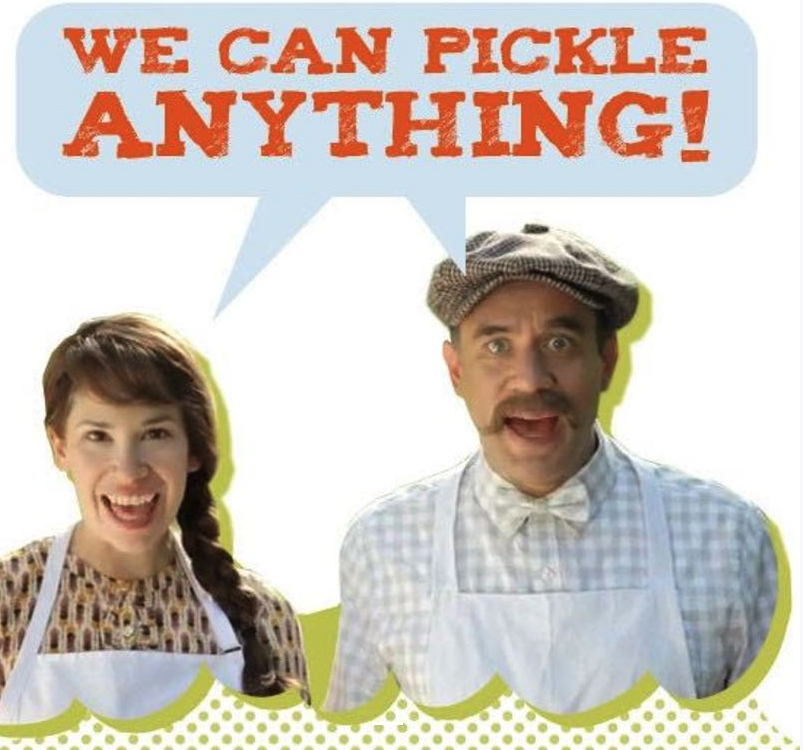

In [9]:
from IPython.display import Image
Image(filename='images/pickle_anything.png')

### Saving models as pickle files

Now that we've imported the pickle library, we're going to use `pickle.dump()` to _dump_ our model into a pickle file.

We're going to use a _context manager_ to:
1. Open up the file on our computer
2. Dump the model into said file

```
with open("./the/path/to/file/and/thefilenameofpickle.pkl", "wb") as picklefile:
    pickle.dump(fitted_model, picklefile)
```

The first line saves all of our information into one variable that we're calling "picklefile":
- The name and location on our computer where we want to save this pickle file.
- Write bytesstream (write is lower level computer terminology for "save this to the disk")
- The second line dumps our model (called an "object" because again, we can pickle any python object) into said picklefile variable
- Context managers also technically "close" the file... but this happens under the hood. It's the little things like this that make using them is so fantastic.

Dump your model into a `.pkl` file in your `app` folder

In [10]:
!pwd

/Users/nicholasbeaudoin/Desktop/GA/DATR_601/Lessons/19-AWS/flask_3.0


**MAKE SURE STUDENTS ARE STORING THIS IN THE CORRECT LOCATION!!!**

In [13]:
with open("app/lin_reg.pkl", "wb") as pickle_file:
    pickle.dump(linreg, pickle_file)

### Combining our Powers!

Open your text editor again and let's copy that code into a new Python file. 

That "hello world" stuff is probably getting boring. Name your Python file something snazzy.

Now, there's a form that's been created for you already. Our focus in this class isn't to learn HTML, it's to model and then stand those models up!

Move "page.html" into your app folder 

We're going to add in our model. Also, since we're using SkLearn functionality, we need SKLearn, as well as Numpy to make arrays


```
import numpy as np
import pickle

from sklearn.linear_model import LinearRegression

with open('./housing_prediction.pkl', 'rb') as picklefile:
    PREDICTOR = pickle.load(picklefile)
```

Add a line to import pickle, then we can `pickle.load()` our way to glory.

#### Why are we loading our pickle file in? Couldn't we just train a model? 

We don't have to train the model over and over again. It is also computationally less expensive to load it.

```
import flask
app = flask.Flask(__name__)

@app.route('/page')
def page():
   with open("page.html", 'r') as viz_file:
       return viz_file.read()
```

Then we're going to have Flask read in our form, and display that from as a special page

This function returns our HTML page!

p.s. note that we're just reading in with an "r" because this isn't a bytestream

```
@app.route('/result', methods=['POST', 'GET'])
def result():

    if flask.request.method == 'POST':
        
        # this line says "if a POST happens: then obtain the inputs from the form"
        inputs = flask.request.form
        
        #once we have the inputs, we can use their variable names (defined in the HTML) as our Python Variables
        beds = inputs['beds'][0]
        baths = inputs['baths'][0]
        sq_ft = inputs['sq_ft'][0]
        
        #then, we can create a numpy array of type float. Explicitly casting it as a float 
        #ensures that we get the correct datatype (iow: makes certain that we have numbers!)
        item = np.array([[beds, baths, sq_ft]]).astype(float)
        
        #then we can make a prediction, given some new data
        score = PREDICTOR.predict(item)
        
        #since .predict returns a numpy array, we need to grab "index 0" 
        # we then use the built in python "round" function to round our number to the hundreds place
        score = round(score[0], 2)
        
        #then we save this score as a Python dictionary
        results = {"This house's price is": "${}".format(score)}
        
        #finally, the function turns the dictionary into a JSON (since they're so close in syntax!)
        #we want to turn our results into a JSON, because Web Developers can use handy key/value pairs 
        # in JavaScript!
        return flask.jsonify(results)

```

Then when a user hits the "submit" button, we GET our variables, and then we we're going to run our predictions, by POSTing the results!

```
@app.route('/result', methods=['POST', 'GET'])
def result():

    if flask.request.method == 'POST':

        inputs = flask.request.form

        beds = inputs['beds'][0]
        baths = inputs['baths'][0]
        sq_ft = inputs['sq_ft'][0]
        item = np.array([[beds, baths, sq_ft]]).astype(float)
        score = PREDICTOR.predict(item)
        score = round(score[0], 2)
        results = {"This house's price is": "${}".format(score)}
        return flask.jsonify(results)
        
if __name__  == '__main__':
    app.run(debug=True)
```

We display these results in JSON format. JSON is easily consumed by any web service, and since JavaScript is one of the most popular languages for web dev, JSON is a great format.

### Lesson Recap:

#### What is Flask?

#### What is a pickle?

#### Where is our "website" right now?

#### Why did we display our results in JSON?

#### What does the `.predict()` do with our new data?

#### Who can access our "website" when we have localhost?

#### What is the standard port that Flask deploys on?